In [1]:
import pandas as pd

## Label_encoder

In [2]:
df = pd.DataFrame({
    'A' : ['a','b','c','a','b'],
    'B' : [1,2,3,1,0]
})

df

,A,B
0,a,1
1,b,2
2,c,3
3,a,1
4,b,0


In [3]:
from sklearn.preprocessing import LabelEncoder

# 문자로 된 데이터를 숫자 - 카테고리컬한 데이터로 변환
le = LabelEncoder()
le.fit(df["A"])

LabelEncoder()

In [4]:
le.classes_

array(['a', 'b', 'c'], dtype=object)

In [5]:
# fit한 후에 transform
df["le_A"] = le.transform(df["A"])
df

,A,B,le_A
0,a,1,0
1,b,2,1
2,c,3,2
3,a,1,0
4,b,0,1


In [6]:
# 한번에 변환하는 fit_transfrom
le.fit_transform(df['A'])

array([0, 1, 2, 0, 1])

In [7]:
# 역변환
le.inverse_transform([1,2,2,2])

array(['b', 'c', 'c', 'c'], dtype=object)

## min-max scaling

$x = \frac{x - min(x)}{max(x) - min(x)}$

In [9]:
df = pd.DataFrame({
    'A' : [10,20,-10, 0, 25],
    'B' : [1,2,3,1,0]
})

df

,A,B
0,10,1
1,20,2
2,-10,3
3,0,1
4,25,0


In [10]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(df)

MinMaxScaler()

In [11]:
mms.data_max_, mms.data_min_

(array([25.,  3.]), array([-10.,   0.]))

In [12]:
df_mms = mms.transform(df)
df_mms

array([[0.57142857, 0.33333333],
       [0.85714286, 0.66666667],
       [0.        , 1.        ],
       [0.28571429, 0.33333333],
       [1.        , 0.        ]])

In [13]:
mms.inverse_transform(df_mms)

array([[ 10.,   1.],
       [ 20.,   2.],
       [-10.,   3.],
       [  0.,   1.],
       [ 25.,   0.]])

In [14]:
mms.fit_transform(df)

array([[0.57142857, 0.33333333],
       [0.85714286, 0.66666667],
       [0.        , 1.        ],
       [0.28571429, 0.33333333],
       [1.        , 0.        ]])

## Standart Scaler

표준정규분포: $Z = \frac{X - μ}{σ} $

In [15]:
df

,A,B
0,10,1
1,20,2
2,-10,3
3,0,1
4,25,0


In [16]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(df)

StandardScaler()

In [17]:
ss.mean_, ss.scale_

(array([9. , 1.4]), array([12.80624847,  1.0198039 ]))

In [19]:
df_ss = ss.transform(df)
df_ss

array([[ 0.07808688, -0.39223227],
       [ 0.85895569,  0.58834841],
       [-1.48365074,  1.56892908],
       [-0.70278193, -0.39223227],
       [ 1.2493901 , -1.37281295]])

In [20]:
ss.fit_transform(df)

array([[ 0.07808688, -0.39223227],
       [ 0.85895569,  0.58834841],
       [-1.48365074,  1.56892908],
       [-0.70278193, -0.39223227],
       [ 1.2493901 , -1.37281295]])

In [21]:
ss.inverse_transform(df_ss)

array([[ 10.,   1.],
       [ 20.,   2.],
       [-10.,   3.],
       [  0.,   1.],
       [ 25.,   0.]])

## Robust Scaler

$\frac{x_i - Q_2}{Q_3 - Q_1}$

In [22]:
df = pd.DataFrame({
    'A' : [-0.1,0,0.1, 0.2, 0.3, 0.4, 1.0, 1.1, 5]
})

df

,A
0,-0.1
1,0.0
2,0.1
3,0.2
4,0.3
5,0.4
6,1.0
7,1.1
8,5.0


In [23]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

mm = MinMaxScaler()
ss = StandardScaler()
rs = RobustScaler()

In [25]:
df_scaler = df.copy()

df_scaler["MinMax"] = mm.fit_transform(df)
df_scaler["Standard"] = ss.fit_transform(df)
df_scaler["Robust"] = rs.fit_transform(df)

In [26]:
df_scaler

,A,MinMax,Standard,Robust
0,-0.1,0.000000,-0.656688,-0.444444
1,0.0,0.019608,-0.590281,-0.333333
2,0.1,0.039216,-0.523875,-0.222222
3,0.2,0.058824,-0.457468,-0.111111
4,0.3,0.078431,-0.391061,0.000000
5,0.4,0.098039,-0.324655,0.111111
6,1.0,0.215686,0.073785,0.777778
7,1.1,0.235294,0.140192,0.888889
8,5.0,1.000000,2.730051,5.222222


### 시각화

<AxesSubplot:>

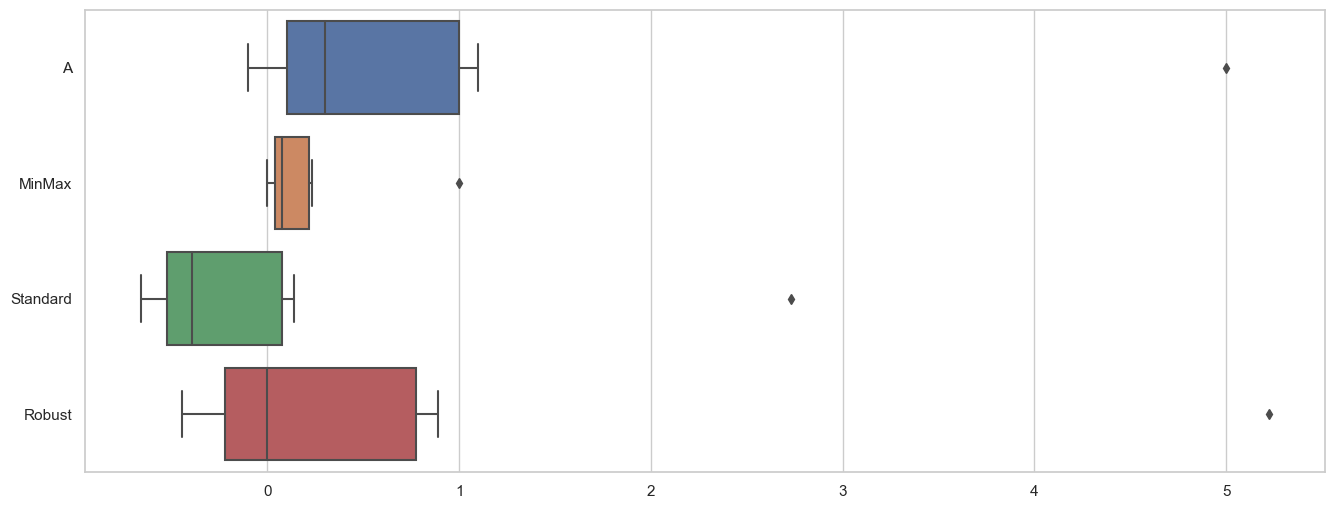

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='whitegrid')
plt.figure(figsize=(16,6))
sns.boxplot(data = df_scaler, orient= 'h')

각 스케일러의 이상치의 위치를 보면서 데이터에 적합한 스케일러를 찾도록 노력해야한다.

# Decision Tree를 이용한 와인 데이터 분석

In [1]:
import pandas as pd

red_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-red.csv'
white_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-white.csv'

red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';')

In [2]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
# 컬럼 종류
white_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
# 데이터 하나로 합치기
red_wine['color'] = 1
white_wine['color'] = 0

wine = pd.concat([red_wine, white_wine])
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [7]:
# quality는 3~ 9등급으로 구성
wine["quality"].unique()

array([5, 6, 7, 4, 8, 3, 9], dtype=int64)

In [8]:
import plotly.express as px

fig = px.histogram(wine, x= 'quality')
fig.show()

In [9]:
fig = px.histogram(wine, x= 'quality', color='color')
fig.show()

## 레드와인/ 화이트 와인 분류기

In [11]:
X = wine.drop(["color"], axis=1)
y = wine['color']

In [12]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 13)
np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([3913, 1284], dtype=int64))

In [14]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(x=X_train["quality"], name = 'train'))
fig.add_trace(go.Histogram(x=X_test["quality"], name='Test'))

fig.update_layout(barmode= 'overlay') #겹쳐보이게
fig.update_traces(opacity=0.75) # 투명도
fig.show()

### 결정나무 훈련

In [15]:
from sklearn.tree import DecisionTreeClassifier

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

In [16]:
from sklearn.metrics import accuracy_score

y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print('Train Acc : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc : ', accuracy_score(y_test, y_pred_test))

Train Acc :  0.9553588608812776
Test Acc :  0.9569230769230769


### 데이터 전처리 - MinMaxScaler와 StandardScaler

In [17]:
fig = go.Figure()
fig.add_trace(go.Box(y = X["fixed acidity"], name = 'fixed acidity'))
fig.add_trace(go.Box(y = X["chlorides"], name = 'chlorides'))
fig.add_trace(go.Box(y = X["quality"], name = 'quality'))

fig.show()

- 컴럼들의 최대/최소 범위가 각각 다르고, 평균과 분산이 각각 다르다.
- 특성(feature)의 편향 문제는 최적의 모델을 찾는데 방해가 될 수도 있다.

In [18]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

MMS = MinMaxScaler()
SS = StandardScaler()

SS.fit(X)
MMS.fit(X)

X_ss = SS.transform(X)
X_mms = MMS.transform(X)

X_ss_pd = pd.DataFrame(X_ss, columns=X.columns)
X_mms_pd = pd.DataFrame(X_mms, columns=X.columns)

- 결정나무에서는 이런 전처리는 의미를 가지지 않는다.
- 주로 cost Function을 최적화할 때 유효할 때가 있다.
- MinMaxScaler와 StandardScaler중 어떤 것이 좋을지는 해봐야 안다.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_mms_pd, y, test_size=0.2, random_state= 13)

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print('Train Acc : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc : ', accuracy_score(y_test, y_pred_test))

Train Acc :  0.9553588608812776
Test Acc :  0.9569230769230769


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_ss_pd, y, test_size=0.2, random_state= 13)

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print('Train Acc : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc : ', accuracy_score(y_test, y_pred_test))

Train Acc :  0.9553588608812776
Test Acc :  0.9569230769230769


In [30]:
# 중요 특성

dict(zip(X_train.columns, wine_tree.feature_importances_))

{'fixed acidity': 0.0,
 'volatile acidity': 0.0,
 'citric acid': 0.0,
 'residual sugar': 0.0,
 'chlorides': 0.24230360549660776,
 'free sulfur dioxide': 0.0,
 'total sulfur dioxide': 0.7576963945033922,
 'density': 0.0,
 'pH': 0.0,
 'sulphates': 0.0,
 'alcohol': 0.0,
 'quality': 0.0}

- MaxDepth를 높이면 저 수치에도 변화가 온다.

### 와인 맛에 대한 분류 - 이진 분류

In [31]:
wine['taste'] = [1. if grade>5 else 0. for grade in wine["quality"]]
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   int64  
 13  taste                 6497 non-null   float64
dtypes: float64(12), int64(2)
memory usage: 761.4 KB


In [32]:
X = wine.drop(["taste", 'quality'], axis=1)
y = wine['taste']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 13)

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print('Train Acc : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc : ', accuracy_score(y_test, y_pred_test))

Train Acc :  0.7294593034442948
Test Acc :  0.7161538461538461


In [33]:
dict(zip(X_train.columns, wine_tree.feature_importances_))

{'fixed acidity': 0.0,
 'volatile acidity': 0.2714166536849971,
 'citric acid': 0.0,
 'residual sugar': 0.0,
 'chlorides': 0.0,
 'free sulfur dioxide': 0.057120460609986594,
 'total sulfur dioxide': 0.0,
 'density': 0.0,
 'pH': 0.0,
 'sulphates': 0.0,
 'alcohol': 0.6714628857050162,
 'color': 0.0}

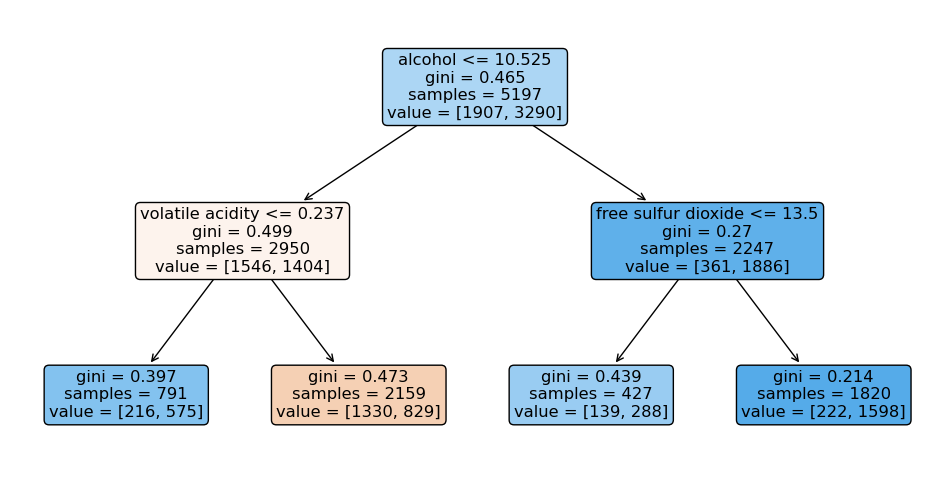

In [34]:
import matplotlib.pyplot as plt
import sklearn.tree as tree

plt.figure(figsize=(12,6))
tree.plot_tree(wine_tree, feature_names= X.columns,
               rounded= True, filled= True)

plt.show()

# Pipeline

In [35]:
import pandas as pd

red_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-red.csv'
white_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-white.csv'

red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';')

red_wine['color'] = 1.
white_wine['color'] = 0.

wine = pd.concat([red_wine, white_wine])

In [36]:
X = wine.drop(['color'], axis=1)
y = wine['color']

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

estimators = [('scaler', StandardScaler()),
              ('clf', DecisionTreeClassifier())]

pipe = Pipeline(estimators)

In [38]:
pipe.steps

[('scaler', StandardScaler()), ('clf', DecisionTreeClassifier())]

In [39]:
pipe.steps[0]

('scaler', StandardScaler())

In [40]:
pipe.steps[1]

('clf', DecisionTreeClassifier())

In [41]:
pipe[0], pipe['scaler']

(StandardScaler(), StandardScaler())

In [42]:
# set params

pipe.set_params(clf__max_depth=2)
pipe.set_params(clf__random_state=13)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier(max_depth=2, random_state=13))])

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 13, stratify=y)

pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier(max_depth=2, random_state=13))])

In [45]:
from sklearn.metrics import accuracy_score

y_pred_tr = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

print('Train Acc : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc : ', accuracy_score(y_test, y_pred_test))

Train Acc :  0.9657494708485664
Test Acc :  0.9576923076923077


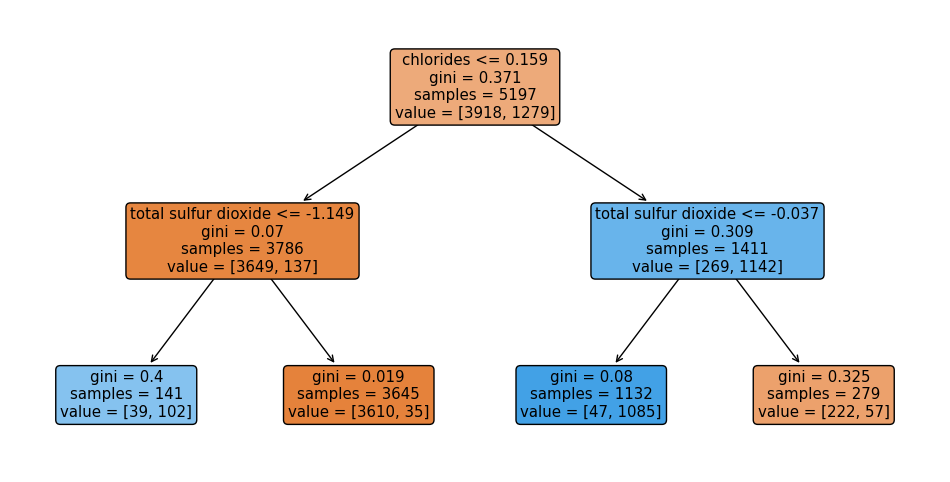

In [47]:
import matplotlib.pyplot as plt
import sklearn.tree as tree

plt.figure(figsize=(12,6))
tree.plot_tree(pipe['clf'], feature_names= X.columns,
               rounded= True, filled= True)

plt.show()

# 하이퍼파라미터 튜닝

### 교차검증

- 과적합: 모델이 학습 데이터만 과도하게 최적화된 현상, 그로 인해 일반화된 데이터에서는 예측 성능이 과하게 떨어짐
- 나에게 주어진 데이터에 적용한 모델의 성능을 정확히 표현하기 위해서도 유용하다

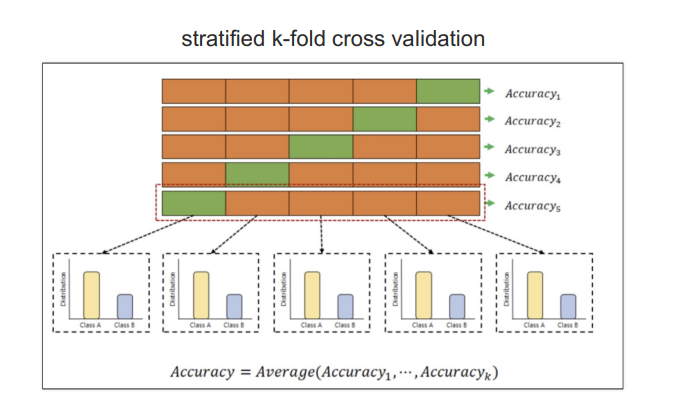

### 교차검증 구현하기

In [48]:
import numpy as np
from sklearn.model_selection import KFold

X = np.array([[1,2],[3,4],[1,2],[3,4]])
y = np.array([1,2,3,4])
kf = KFold(n_splits=2)

print(kf.get_n_splits(X))
print(kf)
for train_idx, test_idx in kf.split(X):
    print('---- idx')
    print(train_idx, test_idx)
    print('---- train data')
    print(X[train_idx])
    print('---- val data')
    print(X[test_idx])


2
KFold(n_splits=2, random_state=None, shuffle=False)
---- idx
[2 3] [0 1]
---- train data
[[1 2]
 [3 4]]
---- val data
[[1 2]
 [3 4]]
---- idx
[0 1] [2 3]
---- train data
[[1 2]
 [3 4]]
---- val data
[[1 2]
 [3 4]]


In [49]:
import pandas as pd

red_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-red.csv'
white_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-white.csv'

red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';')

red_wine['color'] = 1.
white_wine['color'] = 0.

wine = pd.concat([red_wine, white_wine])

In [50]:
wine['taste'] = [1. if grade>5 else 0. for grade in wine["quality"]]

X = wine.drop(['taste','quality'], axis=1)
y = wine["taste"]

In [54]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5)
wine_tree_cv = DecisionTreeClassifier(max_depth=2, random_state=13)

In [52]:
for train_idx, test_idx in kfold.split(X):
    print(len(train_idx), len(test_idx))

5197 1300
5197 1300
5198 1299
5198 1299
5198 1299


In [56]:
cv_accuracy = []

for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    wine_tree_cv.fit(X_train, y_train)
    pred = wine_tree_cv.predict(X_test)
    cv_accuracy.append(accuracy_score(y_test, pred))

cv_accuracy

[0.6007692307692307,
 0.6884615384615385,
 0.7090069284064665,
 0.7628945342571208,
 0.7867590454195535]

In [57]:
np.mean(cv_accuracy)

0.709578255462782

In [58]:
# y비율이 동일하게 KFold
from sklearn.model_selection import StratifiedKFold

skkfold = StratifiedKFold(n_splits=5)
wine_tree_cv = DecisionTreeClassifier(max_depth=2, random_state=13)


cv_accuracy = []

for train_idx, test_idx in skkfold.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    wine_tree_cv.fit(X_train, y_train)
    pred = wine_tree_cv.predict(X_test)
    cv_accuracy.append(accuracy_score(y_test, pred))

cv_accuracy

[0.5523076923076923,
 0.6884615384615385,
 0.7143956889915319,
 0.7321016166281755,
 0.7567359507313318]

In [59]:
np.mean(cv_accuracy)

0.6888004974240539

In [60]:
# cross Validation을 보다 간편히
from sklearn.model_selection import cross_val_score

skkfold = StratifiedKFold(n_splits=5)
wine_tree_cv = DecisionTreeClassifier(max_depth=2, random_state=13)

cross_val_score(wine_tree_cv, X, y, scoring=None, cv = skkfold)

array([0.55230769, 0.68846154, 0.71439569, 0.73210162, 0.75673595])

In [61]:
# depth가 높다고 acc가 좋아지는 것은 아니다.
wine_tree_cv = DecisionTreeClassifier(max_depth=5, random_state=13)

cross_val_score(wine_tree_cv, X, y, scoring=None, cv = skkfold)

array([0.50076923, 0.62615385, 0.69745958, 0.7582756 , 0.74903772])

In [62]:
# train score와 함께 보고 싶은면
from sklearn.model_selection import cross_validate

cross_validate(wine_tree_cv, X, y, scoring= None, cv=skkfold, return_train_score= True)

{'fit_time': array([0.01397681, 0.01396203, 0.01299191, 0.01199579, 0.01295733]),
 'score_time': array([0.00198078, 0.00102472, 0.00097013, 0.0009985 , 0.00199556]),
 'test_score': array([0.50076923, 0.62615385, 0.69745958, 0.7582756 , 0.74903772]),
 'train_score': array([0.78795459, 0.78045026, 0.77568295, 0.76356291, 0.76279338])}

## 하이퍼파라미터 튜닝

- 모델의 성능을 확보하기 위해 조절하는 설정 값

In [63]:
import pandas as pd

red_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-red.csv'
white_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-white.csv'

red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';')

red_wine['color'] = 1.
white_wine['color'] = 0.

wine = pd.concat([red_wine, white_wine])

wine['taste'] = [1. if grade>5 else 0. for grade in wine["quality"]]

X = wine.drop(['taste','quality'], axis=1)
y = wine["taste"]

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

params = {'max_depth': [2,4,7,10]}
wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)

gridsearch = GridSearchCV(estimator=wine_tree, param_grid=params, cv=5)
gridsearch.fit(X, y)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=2, random_state=13),
             param_grid={'max_depth': [2, 4, 7, 10]})

In [65]:
# GridSearchCV결과
import pprint

pp = pprint.PrettyPrinter(indent=4)
pp.pprint(gridsearch.cv_results_)

{   'mean_fit_time': array([0.00679283, 0.00937419, 0.01475744, 0.02014565]),
    'mean_score_time': array([0.00178423, 0.00119877, 0.00140638, 0.00139689]),
    'mean_test_score': array([0.6888005 , 0.66356523, 0.65340854, 0.64401587]),
    'param_max_depth': masked_array(data=[2, 4, 7, 10],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object),
    'params': [   {'max_depth': 2},
                  {'max_depth': 4},
                  {'max_depth': 7},
                  {'max_depth': 10}],
    'rank_test_score': array([1, 2, 3, 4]),
    'split0_test_score': array([0.55230769, 0.51230769, 0.50846154, 0.51615385]),
    'split1_test_score': array([0.68846154, 0.63153846, 0.60307692, 0.60076923]),
    'split2_test_score': array([0.71439569, 0.72363356, 0.68360277, 0.66743649]),
    'split3_test_score': array([0.73210162, 0.73210162, 0.73672055, 0.71054657]),
    'split4_test_score': array([0.75673595, 0.7182448 , 0.73518091, 0.72517321]),
    'std

In [66]:
gridsearch.best_estimator_

DecisionTreeClassifier(max_depth=2, random_state=13)

In [67]:
gridsearch.best_score_

0.6888004974240539

In [68]:
gridsearch.best_params_

{'max_depth': 2}

#### pipeline에 gridSearch 적용

In [71]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

estimators = [('scaler', StandardScaler()),
              ('clf', DecisionTreeClassifier(random_state=13))]

pipe = Pipeline(estimators)

In [75]:
param_grid = [{'clf__max_depth': [2,4,7,10]}]

gridsearch = GridSearchCV(estimator=pipe, param_grid = param_grid, cv=5)
gridsearch.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf',
                                        DecisionTreeClassifier(random_state=13))]),
             param_grid=[{'clf__max_depth': [2, 4, 7, 10]}])

In [76]:
gridsearch.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier(max_depth=2, random_state=13))])

In [77]:
gridsearch.best_score_

0.6888004974240539

In [79]:
gridsearch.cv_results_

{'mean_fit_time': array([0.00937443, 0.01196079, 0.01655822, 0.02153778]),
 'std_fit_time': array([0.00100759, 0.0014075 , 0.00078277, 0.00049879]),
 'mean_score_time': array([0.00159864, 0.00159163, 0.00139847, 0.00119929]),
 'std_score_time': array([0.00048629, 0.00049418, 0.00047772, 0.00039817]),
 'param_clf__max_depth': masked_array(data=[2, 4, 7, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'clf__max_depth': 2},
  {'clf__max_depth': 4},
  {'clf__max_depth': 7},
  {'clf__max_depth': 10}],
 'split0_test_score': array([0.55230769, 0.51230769, 0.50846154, 0.51615385]),
 'split1_test_score': array([0.68846154, 0.63153846, 0.60461538, 0.60230769]),
 'split2_test_score': array([0.71439569, 0.72363356, 0.68206313, 0.66589684]),
 'split3_test_score': array([0.73210162, 0.73210162, 0.73672055, 0.71054657]),
 'split4_test_score': array([0.75673595, 0.7182448 , 0.73518091, 0.72517321]),
 'mean_test_score': array([0.688

In [80]:
# 표로 성능 결과 정리
import pandas as pd

score_df = pd.DataFrame(gridsearch.cv_results_)
score_df[['params', 'rank_test_score', 'mean_test_score','std_test_score']]

,params,rank_test_score,mean_test_score,std_test_score
0,{'clf__max_depth': 2},1,0.688800,0.071799
1,{'clf__max_depth': 4},2,0.663565,0.083905
2,{'clf__max_depth': 7},3,0.653408,0.086993
3,{'clf__max_depth': 10},4,0.644016,0.076915
